<a href="https://colab.research.google.com/github/chelynl/Machine_Learning/blob/main/Tree_based_Regressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Regression

- do not require feature scaling
- can handle missing values
- splits data based on attribute that will result in more pure data
 - minimizes SSE or std after split
 - measures of impurity: gini, information gain, entropy
- tends to overfit with 1d (1 feature), so it is more relevant for higher dimensions

In [ ]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

In [16]:
df = pd.read_csv('https://raw.githubusercontent.com/chelynl/ML_notes/main/regression/Position_Salaries.csv?token=AMGO4MEYDKTGOJV7FWFNBNDAYJDBC')

In [17]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [18]:
# Define inputs and target
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

## Train model on whole dataset

In [19]:
# Instantiate decision tree model
dt = DecisionTreeRegressor(random_state=0)
# Fit model to all data
dt.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [20]:
# Predict salary for someone with level 6.5
dt.predict([[6.5]])

array([150000.])

## Visualize decision tree results

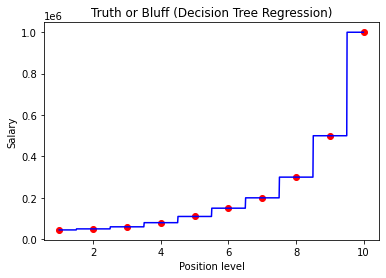

In [21]:
# Custom grid makes the plot look prettier (higher resolution)
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X, y, color = 'red')
plt.plot(X_grid, dt.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

You cannot do variable selection based on p-values since decision tree is not a linear model. However, you can do use ***importance scores*** of features based on the reduction in the criterion (gini, entropy, etc.) used to select split points.

# Random Forest Regression

Pros:
- higher predictive power compared to decision trees
- ensemble of unpruned decision trees

Cons:
- no interpretability whereas you can see the different splits leading up to the prediction in decision trees
- tendency to overfit

In [22]:
# Load RF package
from sklearn.ensemble import RandomForestRegressor

In [23]:
# Instantiate rf model object
rf = RandomForestRegressor(n_estimators=10, random_state=0)

# Fit model to whole data
rf.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [24]:
# Predict salary for someone with level 6.5
rf.predict([[6.5]])

array([167000.])

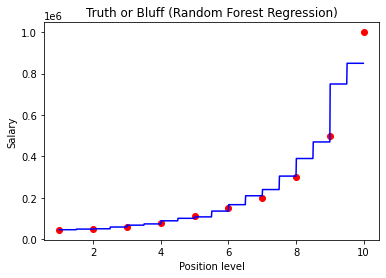

In [26]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, rf.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()